In [1]:
import math
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd 
from scipy.stats import weibull_min, uniform
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    classification_report, 
    confusion_matrix, 
    ConfusionMatrixDisplay
)
from sklearn.model_selection import train_test_split
import seaborn as sns 
from sklearn.datasets import make_classification
import xgboost as xgb

np.random.seed(42)

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
n_samples = 5000
stow_prop = 0.10
# wo_prop = 0.30
n_stow = math.ceil(n_samples * stow_prop)
n_wo = n_samples - n_stow 
# n_wo = math.ceil(n_samples * wo_prop)
# n_null = n_samples - (n_stow + n_wo)

null_sample_size_range = [150, 300]
non_null_sample_size_range = [30, 50]

shape_wo_range = [1.2, 2.0]
shape_stow_range = [0.6, 0.9]

noise_max = 300

In [3]:
n_wo

4500

In [4]:
n_stow

500

In [5]:
data_samples_wo = []
add_noise = True

for sample in range(n_wo): 
    n_non_null_points = np.random.randint(non_null_sample_size_range[0], non_null_sample_size_range[1])
    print(f'{n_non_null_points}--')

    shape_wo = np.random.uniform(shape_wo_range[0], shape_wo_range[1])
    non_null_points = weibull_min.rvs(c=shape_wo, scale=100, size=n_non_null_points)
    
    if add_noise: 
        n_null_points = np.random.randint(null_sample_size_range[0], null_sample_size_range[1])
        null_points = uniform.rvs(loc=0, scale=noise_max, size=n_null_points)
        print(n_null_points)
        data_samples_wo.append(np.concatenate((null_points, non_null_points), axis=0))
    else: 
        data_samples_wo.append(non_null_points)
        
y_wo = np.zeros(shape=n_wo)

36--
279
30--
296
49--
187
44--
171
46--
197
41--
180
47--
184
43--
262
30--
209
36--
183
30--
242
49--
258
47--
206
40--
236
32--
286
40--
260
35--
293
33--
196
46--
168
31--
239
40--
299
36--
246
35--
164
41--
259
36--
252
39--
290
37--
247
46--
210
34--
232
35--
156
31--
230
38--
181
37--
174
30--
175
46--
282
39--
238
34--
280
43--
160
48--
235
42--
260
48--
245
46--
263
39--
227
37--
238
41--
218
37--
150
37--
296
47--
268
47--
269
40--
213
35--
170
44--
260
40--
207
38--
225
37--
261
45--
290
43--
293
47--
260
35--
226
33--
187
43--
292
44--
295
30--
200
41--
162
42--
206
36--
189
34--
209
38--
297
42--
243
47--
239
47--
155
31--
284
31--
171
31--
213
46--
252
45--
226
30--
245
34--
209
38--
184
44--
246
44--
243
33--
298
45--
263
48--
291
45--
258
41--
230
46--
181
35--
224
45--
161
34--
154
46--
255
49--
223
38--
198
42--
276
33--
157
39--
181
41--
253
46--
240
47--
165
40--
215
31--
270
35--
223
48--
272
43--
165
46--
263
42--
154
40--
198
43--
155
49--
152
38--
160
36--
238
3

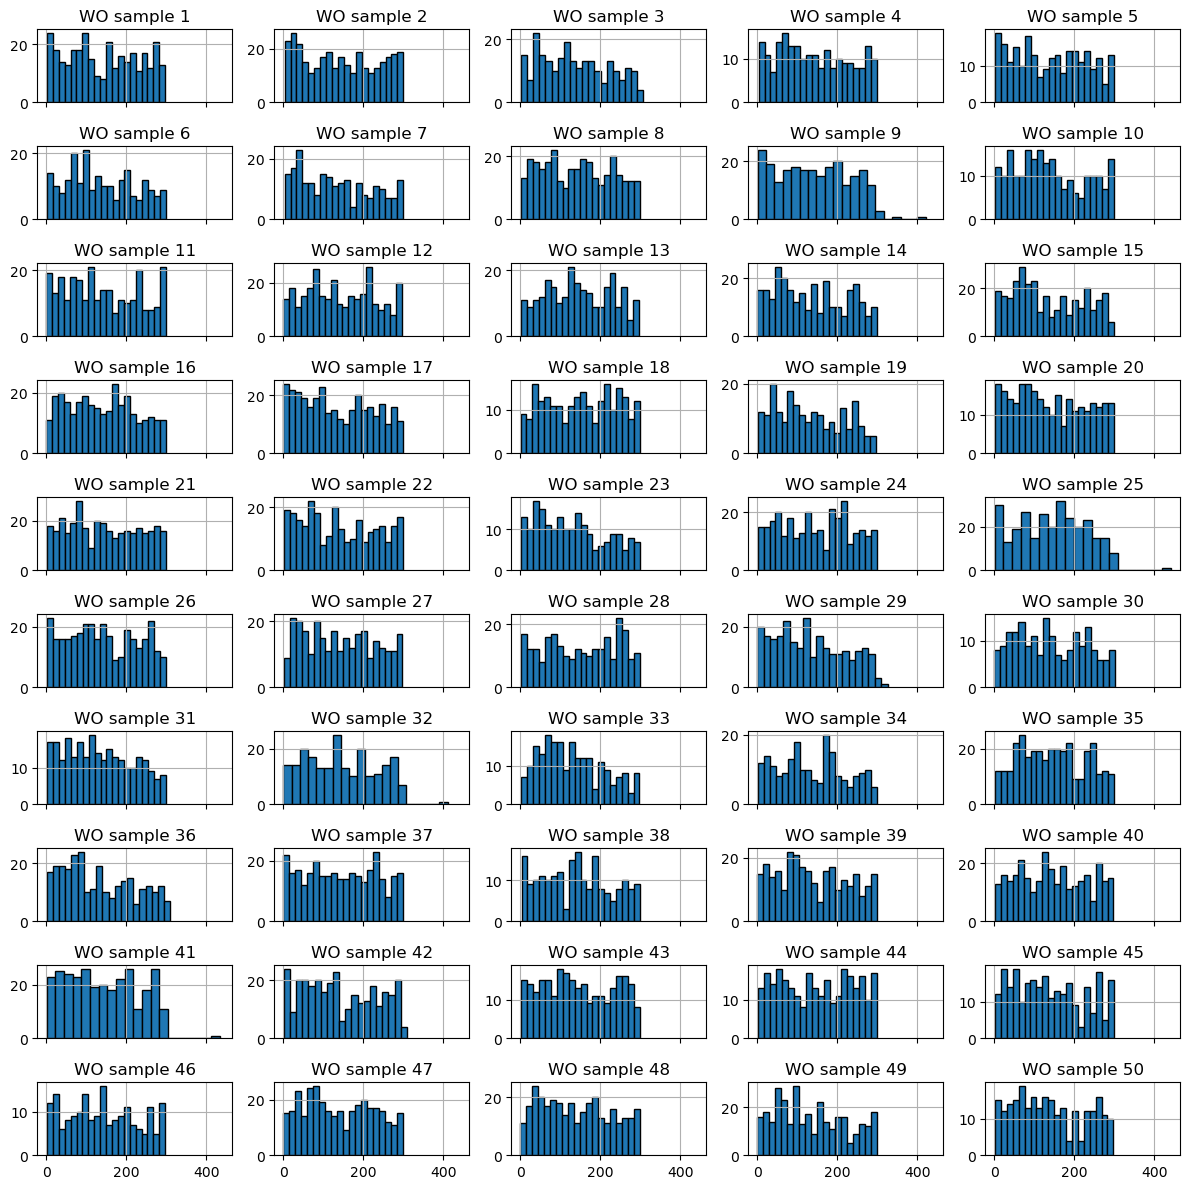

In [6]:
nrow = 10
ncol = 5
fig, axes = plt.subplots(nrow, ncol, figsize=(12,12), sharex=True)
ax_flat = axes.flatten()

txt = 'WO sample'
for ax, sample_index in zip(ax_flat, list(range(nrow*ncol))): 
    selected_sample = data_samples_wo[sample_index]
    ax.hist(selected_sample, bins=20, edgecolor='black')
    ax.set_title(f'{txt} {sample_index+1}')
    ax.grid(True)

plt.tight_layout()
plt.show();


In [7]:
data_samples_stow = []
add_noise = True

for sample in range(n_stow): 
    n_non_null_points = np.random.randint(non_null_sample_size_range[0], non_null_sample_size_range[1])
    print(f'{n_non_null_points}--')

    shape_stow = np.random.uniform(shape_stow_range[0], shape_stow_range[1])
    loc_stow = np.random.uniform(0, noise_max * .8)
    non_null_points = weibull_min.rvs(c=shape_stow, scale=20, loc=loc_stow, size=n_non_null_points)
    
    if add_noise: 
        n_null_points = np.random.randint(null_sample_size_range[0], null_sample_size_range[1])
        null_points = uniform.rvs(loc=0, scale=noise_max, size=n_null_points)
        print(n_null_points)
        data_samples_stow.append(np.concatenate((null_points, non_null_points), axis=0))
    else: 
        data_samples_stow.append(non_null_points)
        
y_stow = np.ones(shape=n_stow)

46--
234
47--
267
31--
206
41--
258
31--
222
42--
287
31--
156
47--
209
33--
291
46--
193
46--
262
37--
214
45--
188
41--
239
36--
203
44--
284
45--
177
36--
234
34--
152
45--
246
38--
186
36--
263
49--
259
48--
238
40--
297
37--
291
39--
201
44--
178
47--
164
38--
243
46--
169
49--
191
38--
182
37--
187
45--
221
46--
172
31--
172
31--
298
43--
250
35--
244
44--
232
48--
288
47--
229
42--
299
32--
214
41--
156
45--
274
33--
299
42--
215
48--
276
36--
236
39--
253
45--
296
31--
285
30--
248
32--
169
49--
211
34--
158
39--
157
44--
218
42--
242
31--
186
49--
176
45--
232
46--
242
39--
162
45--
265
41--
243
41--
238
44--
203
40--
220
49--
245
31--
264
46--
269
37--
257
36--
179
39--
157
45--
293
33--
227
31--
188
45--
269
44--
222
45--
202
34--
151
30--
178
47--
150
33--
211
38--
173
48--
234
41--
211
33--
179
33--
177
30--
197
37--
230
31--
247
37--
229
34--
236
30--
242
33--
262
42--
238
34--
174
44--
284
36--
244
39--
229
34--
265
46--
171
32--
165
46--
158
46--
271
39--
170
46--
240
3

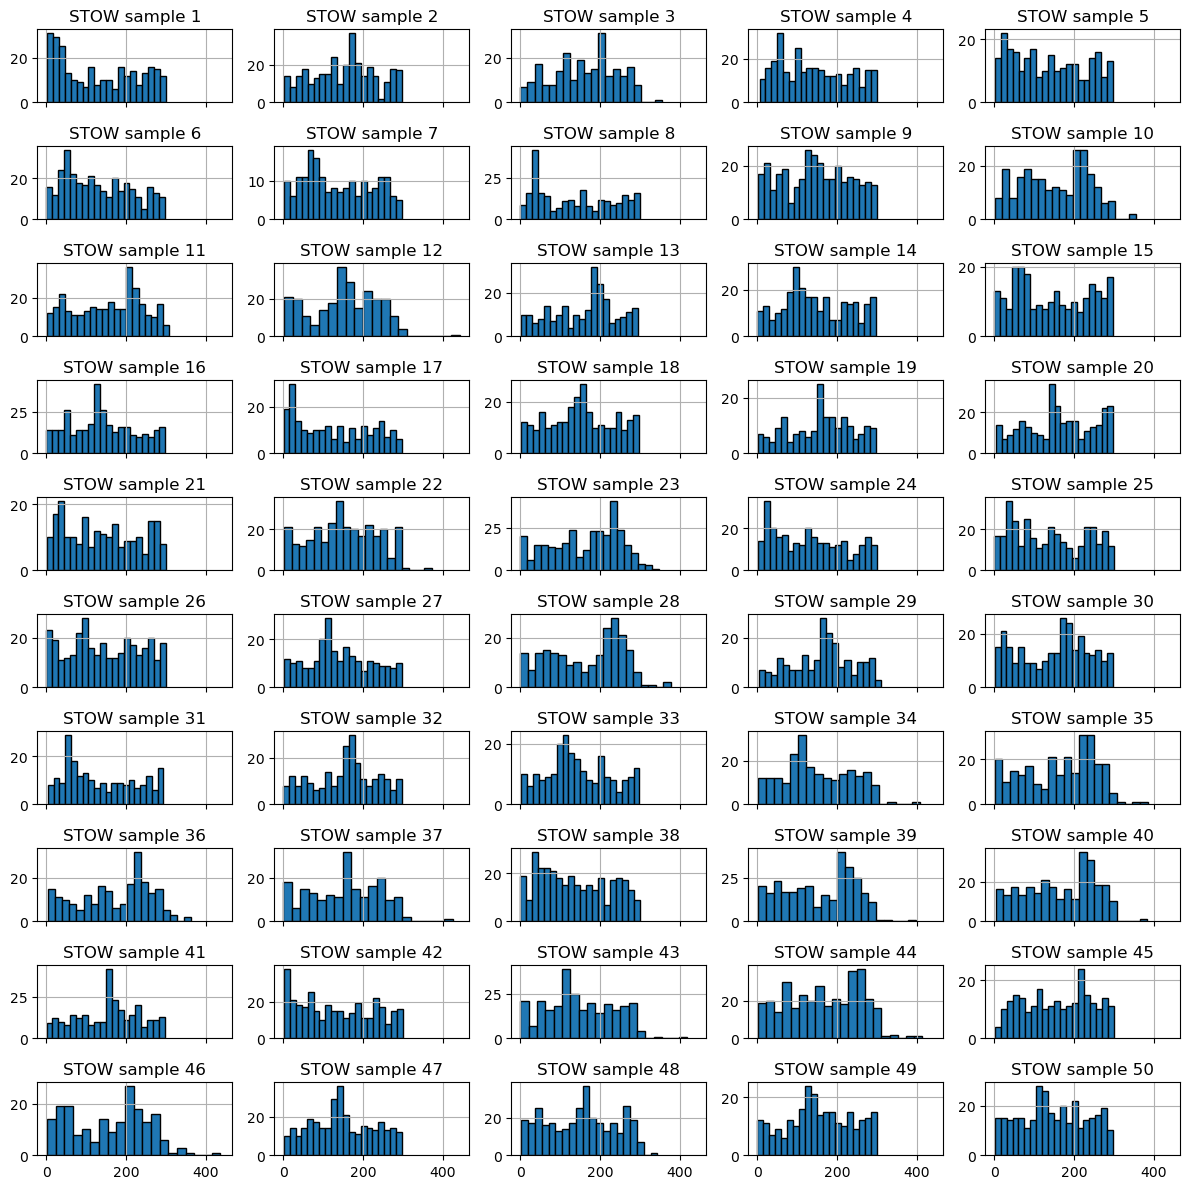

In [8]:
nrow = 10
ncol = 5
fig, axes = plt.subplots(nrow, ncol, figsize=(12,12), sharex=True)
ax_flat = axes.flatten()

txt = 'STOW sample'
for ax, sample_index in zip(ax_flat, list(range(nrow*ncol))): 
    selected_sample = data_samples_stow[sample_index]
    ax.hist(selected_sample, bins=20, edgecolor='black')
    ax.set_title(f'{txt} {sample_index+1}')
    ax.grid(True)

plt.tight_layout()
plt.show();

In [9]:
data_samples = data_samples_wo + data_samples_stow

# FE Approach 01: nan padding

In [10]:
max_n_wo = max([len(sample) for sample in data_samples_wo])
max_n_stow = max([len(sample) for sample in data_samples_stow])
max_obs_per_sample = max([max_n_wo, max_n_stow])

data_samples_padded = (
    [
        np.pad(
            sample, 
            (0, max_obs_per_sample - len(sample)),
            mode='constant', constant_values=np.nan
        ) 
        for sample in data_samples
    ]  
)


X = np.array(data_samples_padded)
y = np.concatenate((y_wo, y_stow), axis=0)

In [11]:
X.shape

(5000, 347)

In [12]:
y.shape

(5000,)

In [13]:
X_train_and_valid, X_test, y_train_and_valid, y_test = train_test_split(X, y, test_size=0.20, random_state=2023)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_and_valid, y_train_and_valid, test_size=0.20, random_state=2023)

In [14]:
X_train.shape

(3200, 347)

In [15]:
X_valid.shape

(800, 347)

In [16]:
model_dict = {
#     0: LogisticRegression(random_state=11), 
#     1: RandomForestClassifier(random_state=11), 
    2: xgb.XGBClassifier(objective="binary:logistic", random_state=11)
}



model: XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=11, ...)
              precision    recall  f1-score   support

         0.0       0.96      1.00      0.98       733
         1.0       0.97      0.49      0.65        67

    accuracy                           0.96       800
   macro avg       0.96

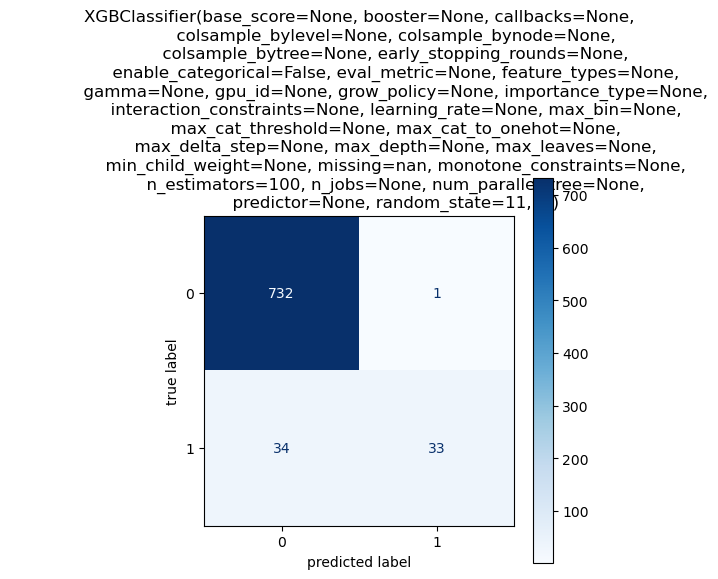

In [17]:
def train_model(model_num, X_train=X_train, y_train=y_train, X_valid=X_valid): 
    m = model_dict.get(model_num)
    m.fit(X_train, y_train)
    preds = m.predict(X_valid)
    return preds 

def evaluate_model(y, y_pred, model_desc=''): 
    cr = classification_report(y, y_pred)
    print(cr) 
    
    cm = confusion_matrix(y, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    fig, ax = plt.subplots(figsize=(5, 5))
    disp.plot(ax=ax, cmap=plt.cm.Blues)
    plt.title(f'{model_desc}')
    plt.xlabel("predicted label")
    plt.ylabel("true label")
    plt.plot()
    

def train_eval_pipeline(model_num, _X_train=X_train, _y_train=y_train, _X_valid=X_valid, _y_valid=y_valid): 
    model_desc = model_dict.get(model_num)
    print(f'\n\nmodel: {model_desc}')
    preds_valid = train_model(model_num, _X_train, _y_train, _X_valid)
    evaluate_model(_y_valid, preds_valid, model_desc)
    

    
for model in model_dict.keys(): 
    train_eval_pipeline(model)



model: XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=11, ...)
              precision    recall  f1-score   support

         0.0       0.92      1.00      0.96       887
         1.0       1.00      0.33      0.49       113

    accuracy                           0.92      1000
   macro avg       0.96

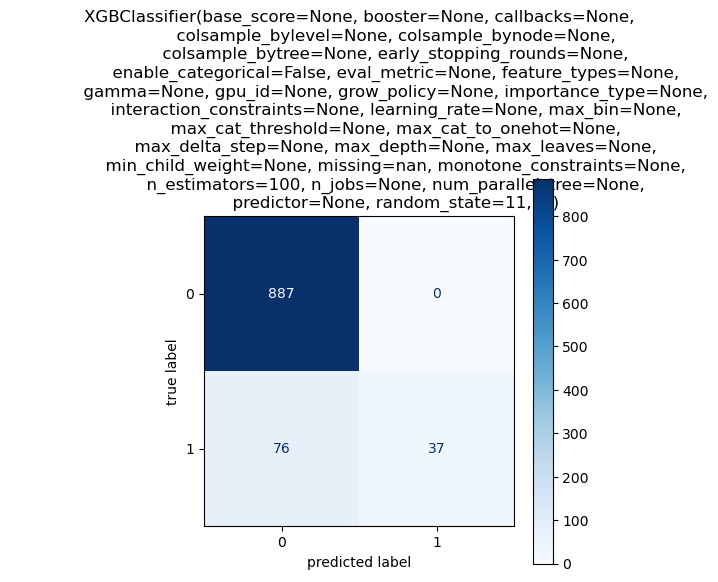

In [18]:
selected_model_num = 2
train_eval_pipeline(selected_model_num, X_train_and_valid, y_train_and_valid, X_test, y_test)

# FE Approach 2: histogram binning 